<a href="https://colab.research.google.com/github/88pawankumarjha/ExtSimpleExamples/blob/master/Copy_of_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
 
from keras.models import Model
from keras.layers import Input, LSTM, GRU, SimpleRNN, Dense
import keras.backend as K
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# get the data
# df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df = pd.read_csv('/content/drive/My Drive/projects/bofa/python/CIPLA.NS.csv', error_bad_lines=False)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,29-07-2019,531.599976,534.950012,520.250000,522.250000,735045.0,CIPLA
1,30-07-2019,522.200012,533.599976,517.799988,520.000000,1665158.0,CIPLA
2,31-07-2019,516.900024,522.700012,506.000000,521.099976,1828077.0,CIPLA
3,01-08-2019,516.150024,519.450012,509.200012,512.450012,1289007.0,CIPLA
4,02-08-2019,509.000000,519.700012,508.700012,516.099976,1574251.0,CIPLA


In [6]:
# calculate returns by first shifting the data
df['PrevClose'] = df['Close'].shift(1) # move everything up 1
 
# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [7]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['Close'] - df['PrevClose']) / df['PrevClose']

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Name,PrevClose,Return
0,29-07-2019,531.599976,534.950012,520.250000,522.250000,735045.0,CIPLA,NaN,NaN
1,30-07-2019,522.200012,533.599976,517.799988,520.000000,1665158.0,CIPLA,522.250000,-0.004308
2,31-07-2019,516.900024,522.700012,506.000000,521.099976,1828077.0,CIPLA,520.000000,0.002115
3,01-08-2019,516.150024,519.450012,509.200012,512.450012,1289007.0,CIPLA,521.099976,-0.016599
4,02-08-2019,509.000000,519.700012,508.700012,516.099976,1574251.0,CIPLA,512.450012,0.007123


In [9]:
# Now turn the full data into numpy arrays
 
# Not yet in the final "X" format!
input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
targets = df['Return'].values

In [ ]:
# Set Ntrain to two-thirds of the dataset
# N = len(input_data) - T
# Ntrain = N * 2 // 3

In [10]:
# Set number of prev. time steps to use
T = 10
 
# Set input dimensionality
D = input_data.shape[1]
 
# Set Ntrain to two-thirds of the dataset
N = len(input_data) - T
Ntrain = N * 2 // 3

In [11]:
input_data_train = input_data[:Ntrain + T - 1]

In [12]:
# scale the data
scaler = StandardScaler()
scaler.fit(input_data_train)
input_data = scaler.transform(input_data)

In [13]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
 
for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [14]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)
 
for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [15]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

In [16]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Train on 156 samples, validate on 79 samples
Epoch 1/300
156/156 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0897 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/300
156/156 [==============================] - 0s 1ms/step - loss: nan - accurac

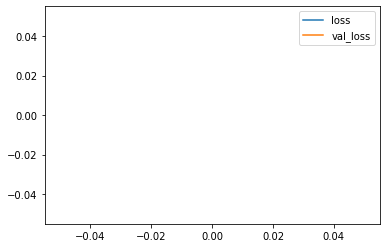

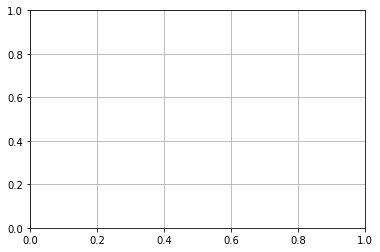

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.grid(True)

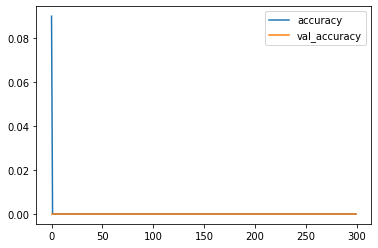

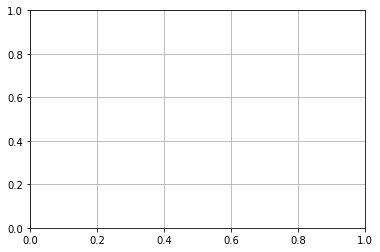

In [20]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.grid(True)